In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [31]:
data = pd.read_csv('Global YouTube Statistics.csv', encoding = 'latin-1')
data.head()


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [32]:
data.shape

(995, 28)

In [33]:
data.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [34]:
data.columns = data.columns.str.replace('_',' ')
data.columns = data.columns.str.title()
data.columns

Index(['Rank', 'Youtuber', 'Subscribers', 'Video Views', 'Category', 'Title',
       'Uploads', 'Country', 'Abbreviation', 'Channel Type',
       'Video Views Rank', 'Country Rank', 'Channel Type Rank',
       'Video Views For The Last 30 Days', 'Lowest Monthly Earnings',
       'Highest Monthly Earnings', 'Lowest Yearly Earnings',
       'Highest Yearly Earnings', 'Subscribers For Last 30 Days',
       'Created Year', 'Created Month', 'Created Date',
       'Gross Tertiary Education Enrollment (%)', 'Population',
       'Unemployment Rate', 'Urban Population', 'Latitude', 'Longitude'],
      dtype='object')

In [35]:
youtube = data[['Youtuber', 'Subscribers', 'Video Views', 'Uploads', 'Category', 'Country', 'Abbreviation', 'Lowest Monthly Earnings', 'Highest Monthly Earnings', 'Gross Tertiary Education Enrollment (%)', 'Unemployment Rate', 'Population', 'Urban Population', 'Created Year']] 
youtube.head()

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
0,T-Series,245000000,2.280000e+11,20082,Music,India,IN,564600.0,9000000.00,28.1,5.36,1.366418e+09,471031528.0,2006.0
1,YouTube Movies,170000000,0.000000e+00,1,Film & Animation,United States,US,0.0,0.05,88.2,14.70,3.282395e+08,270663028.0,2006.0
2,MrBeast,166000000,2.836884e+10,741,Entertainment,United States,US,337000.0,5400000.00,88.2,14.70,3.282395e+08,270663028.0,2012.0
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,966,Education,United States,US,493800.0,7900000.00,88.2,14.70,3.282395e+08,270663028.0,2006.0
4,SET India,159000000,1.480000e+11,116536,Shows,India,IN,455900.0,7300000.00,28.1,5.36,1.366418e+09,471031528.0,2006.0


In [36]:
youtube.columns

Index(['Youtuber', 'Subscribers', 'Video Views', 'Uploads', 'Category',
       'Country', 'Abbreviation', 'Lowest Monthly Earnings',
       'Highest Monthly Earnings', 'Gross Tertiary Education Enrollment (%)',
       'Unemployment Rate', 'Population', 'Urban Population', 'Created Year'],
      dtype='object')

In [37]:
youtube = youtube.dropna(subset= ['Created Year'])
youtube['Created Year'] = youtube['Created Year'].astype('object')
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 994
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 990 non-null    object 
 1   Subscribers                              990 non-null    int64  
 2   Video Views                              990 non-null    float64
 3   Uploads                                  990 non-null    int64  
 4   Category                                 944 non-null    object 
 5   Country                                  870 non-null    object 
 6   Abbreviation                             870 non-null    object 
 7   Lowest Monthly Earnings                  990 non-null    float64
 8   Highest Monthly Earnings                 990 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  869 non-null    float64
 10  Unemployment Rate                        869 non-n

In [38]:
youtube['Created Year'].unique()

array([2006.0, 2012.0, 2013.0, 2015.0, 2010.0, 2016.0, 2018.0, 2014.0,
       2007.0, 2020.0, 2008.0, 2005.0, 2011.0, 2009.0, 2017.0, 2021.0,
       1970.0, 2019.0, 2022.0], dtype=object)

In [39]:
youtube[youtube['Youtuber'] == 'YouTube'] = youtube[youtube['Youtuber'] == 'YouTube'].replace(1970, 2005)
youtube[youtube['Youtuber'] == 'YouTube']


,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
101,YouTube,36300000,3.010785e+09,744,News & Politics,United States,US,5300.0,84400.0,88.2,14.7,328239523.0,270663028.0,2005


In [40]:
youtube['Created Year'].unique()

array([2006.0, 2012.0, 2013.0, 2015.0, 2010.0, 2016.0, 2018.0, 2014.0,
       2007.0, 2020.0, 2008.0, 2005.0, 2011.0, 2009.0, 2017.0, 2021.0,
       2019.0, 2022.0], dtype=object)

In [41]:
youtube.duplicated().sum()

0

In [42]:
zero_views = youtube[youtube['Video Views'] == 0]
zero_views

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
1,YouTube Movies,170000000,0.0,1,Film & Animation,United States,US,0.0,0.05,88.2,14.7,328239523.0,270663028.0,2006.0
5,Music,119000000,0.0,0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2013.0
12,Gaming,93600000,0.0,0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2013.0
18,Sports,75000000,0.0,3,NaN,United States,US,0.0,0.06,88.2,14.7,328239523.0,270663028.0,2006.0
102,News,36300000,0.0,0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2013.0
173,Popular on YouTube,29300000,0.0,3,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2017.0
360,Minecraft - Topic,20900000,0.0,0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2013.0
592,Live,16100000,0.0,0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2015.0


In [43]:
#Remove zero data video views
youtube = youtube.drop(zero_views.index)
youtube.reset_index(drop= True, inplace= True)
youtube[youtube['Video Views'] == 0.0]


,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year


In [45]:
youtube.shape

(982, 14)

In [46]:
youtube.isnull().sum()

Youtuber                                     0
Subscribers                                  0
Video Views                                  0
Uploads                                      0
Category                                    39
Country                                    114
Abbreviation                               114
Lowest Monthly Earnings                      0
Highest Monthly Earnings                     0
Gross Tertiary Education Enrollment (%)    115
Unemployment Rate                          115
Population                                 115
Urban Population                           115
Created Year                                 0
dtype: int64

In [47]:
categorical_variables = youtube.select_dtypes(include= 'O').columns

youtube[categorical_variables] = youtube[categorical_variables].fillna('Other')

In [48]:
youtube.isna().sum()

Youtuber                                     0
Subscribers                                  0
Video Views                                  0
Uploads                                      0
Category                                     0
Country                                      0
Abbreviation                                 0
Lowest Monthly Earnings                      0
Highest Monthly Earnings                     0
Gross Tertiary Education Enrollment (%)    115
Unemployment Rate                          115
Population                                 115
Urban Population                           115
Created Year                                 0
dtype: int64

In [50]:
#Youtube is not null
youtube_not_null = youtube.dropna(subset= ['Gross Tertiary Education Enrollment (%)','Unemployment Rate', 'Population', 'Urban Population'])

#Mean Education Enrollment
mean_edu = round(youtube_not_null['Gross Tertiary Education Enrollment (%)'].mean(),1)
print('Mean Gross Tertiary Education Enrollment:', mean_edu)

#Mean Unemployment Rate
mean_unemp = round(youtube_not_null['Unemployment Rate'].mean(),1)
print('Mean Unemployment Rate:', mean_unemp)

#Mean Population
mean_popu = round(youtube_not_null['Population'].mean(),0)
print('Mean Population:', mean_popu)

#Mean Urban Population
mean_urban = round(youtube_not_null['Urban Population'].mean(),0)
print('Mean Urban Population:', mean_urban)


#There are lots of missing value in the numeric variables
#Replace object datatype column missing values with Mean Values

youtube['Gross Tertiary Education Enrollment (%)'] = youtube['Gross Tertiary Education Enrollment (%)'].fillna(mean_edu)
youtube['Unemployment Rate'] = youtube['Unemployment Rate'].fillna(mean_unemp)
youtube['Population'] = youtube['Population'].fillna(mean_popu)
youtube['Urban Population'] = youtube['Urban Population'].fillna(mean_urban)

Mean Gross Tertiary Education Enrollment: 63.5
Mean Unemployment Rate: 9.3
Mean Population: 431458653.0
Mean Urban Population: 224334935.0


In [51]:
youtube.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 982 non-null    object 
 1   Subscribers                              982 non-null    int64  
 2   Video Views                              982 non-null    float64
 3   Uploads                                  982 non-null    int64  
 4   Category                                 982 non-null    object 
 5   Country                                  982 non-null    object 
 6   Abbreviation                             982 non-null    object 
 7   Lowest Monthly Earnings                  982 non-null    float64
 8   Highest Monthly Earnings                 982 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  982 non-null    float64
 10  Unemployment Rate                        982 non-n

In [52]:
youtube = youtube.sort_values(by = 'Subscribers', ascending= False).reset_index(drop= True)
youtube

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
0,T-Series,245000000,2.280000e+11,20082,Music,India,IN,564600.0,9000000.0,28.1,5.36,1.366418e+09,471031528.0,2006.0
1,MrBeast,166000000,2.836884e+10,741,Entertainment,United States,US,337000.0,5400000.0,88.2,14.70,3.282395e+08,270663028.0,2012.0
2,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,966,Education,United States,US,493800.0,7900000.0,88.2,14.70,3.282395e+08,270663028.0,2006.0
3,SET India,159000000,1.480000e+11,116536,Shows,India,IN,455900.0,7300000.0,28.1,5.36,1.366418e+09,471031528.0,2006.0
4,ýýý Kids Diana Show,112000000,9.324704e+10,1111,People & Blogs,United States,US,182900.0,2900000.0,88.2,14.70,3.282395e+08,270663028.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,Natan por Aï¿,12300000,9.029610e+09,1200,Sports,Brazil,BR,138100.0,2200000.0,51.3,12.08,2.125594e+08,183241641.0,2017.0
978,Free Fire India Official,12300000,1.674410e+09,1500,People & Blogs,India,IN,16200.0,258900.0,28.1,5.36,1.366418e+09,471031528.0,2018.0
979,Panda,12300000,2.214684e+09,2452,Other,United Kingdom,GB,17.0,268.0,60.0,3.85,6.683440e+07,55908316.0,2006.0
980,RobTopGames,12300000,3.741235e+08,39,Gaming,Sweden,SE,968.0,15500.0,67.0,6.48,1.028545e+07,9021165.0,2012.0


In [53]:
youtube.to_csv('Global_Youtube_Statistics_2023_new.csv', index = False)

### *1. Who are the Top 10 YouTubers in terms of subscribers and the Top 10 YouTubers with the highest views?*

In [54]:
#Statistics by Subscribers

#Select columns to show output
select_columns = ['Youtuber', 'Subscribers']

#Filter dataframe for top 10 most subscribers Youtuber channels
top_10_subs = youtube[select_columns].head(10)

#Convert 'Subscriber' in millions
top_10_subs['Subscribers (million)'] = (top_10_subs['Subscribers'] / 1000000).astype('int')
top_10_subs = top_10_subs[['Youtuber', 'Subscribers (million)']]

#Show dataframe
top_10_subs

,Youtuber,Subscribers (million)
0,T-Series,245
1,MrBeast,166
2,Cocomelon - Nursery Rhymes,162
3,SET India,159
4,ýýý Kids Diana Show,112
5,PewDiePie,111
6,Like Nastya,106
7,Vlad and Niki,98
8,Zee Music Company,96
9,WWE,96


In [55]:
#Statistics by Video Views

#Select columns to show output
select_columns = ['Youtuber', 'Video Views']

#Filter dataframe for top 10 most video views Youtuber channels
youtube_videoviews = youtube[select_columns]
top_10_views = youtube_videoviews.sort_values(by = 'Video Views', ascending= False).head(10)

#Convert 'Video Views' in billions
top_10_views['Video Views (billion)'] = (top_10_views['Video Views'] / 1000000000).astype('int')
top_10_views = top_10_views[['Youtuber', 'Video Views (billion)']].sort_values(by= 'Video Views (billion)', ascending= False).reset_index(drop=True)

#Show dataframe
top_10_views

,Youtuber,Video Views (billion)
0,T-Series,228
1,Cocomelon - Nursery Rhymes,164
2,SET India,148
3,Sony SAB,101
4,ýýý Kids Diana Show,93
5,Like Nastya,90
6,WWE,77
7,Vlad and Niki,77
8,Zee TV,73
9,Colors TV,61


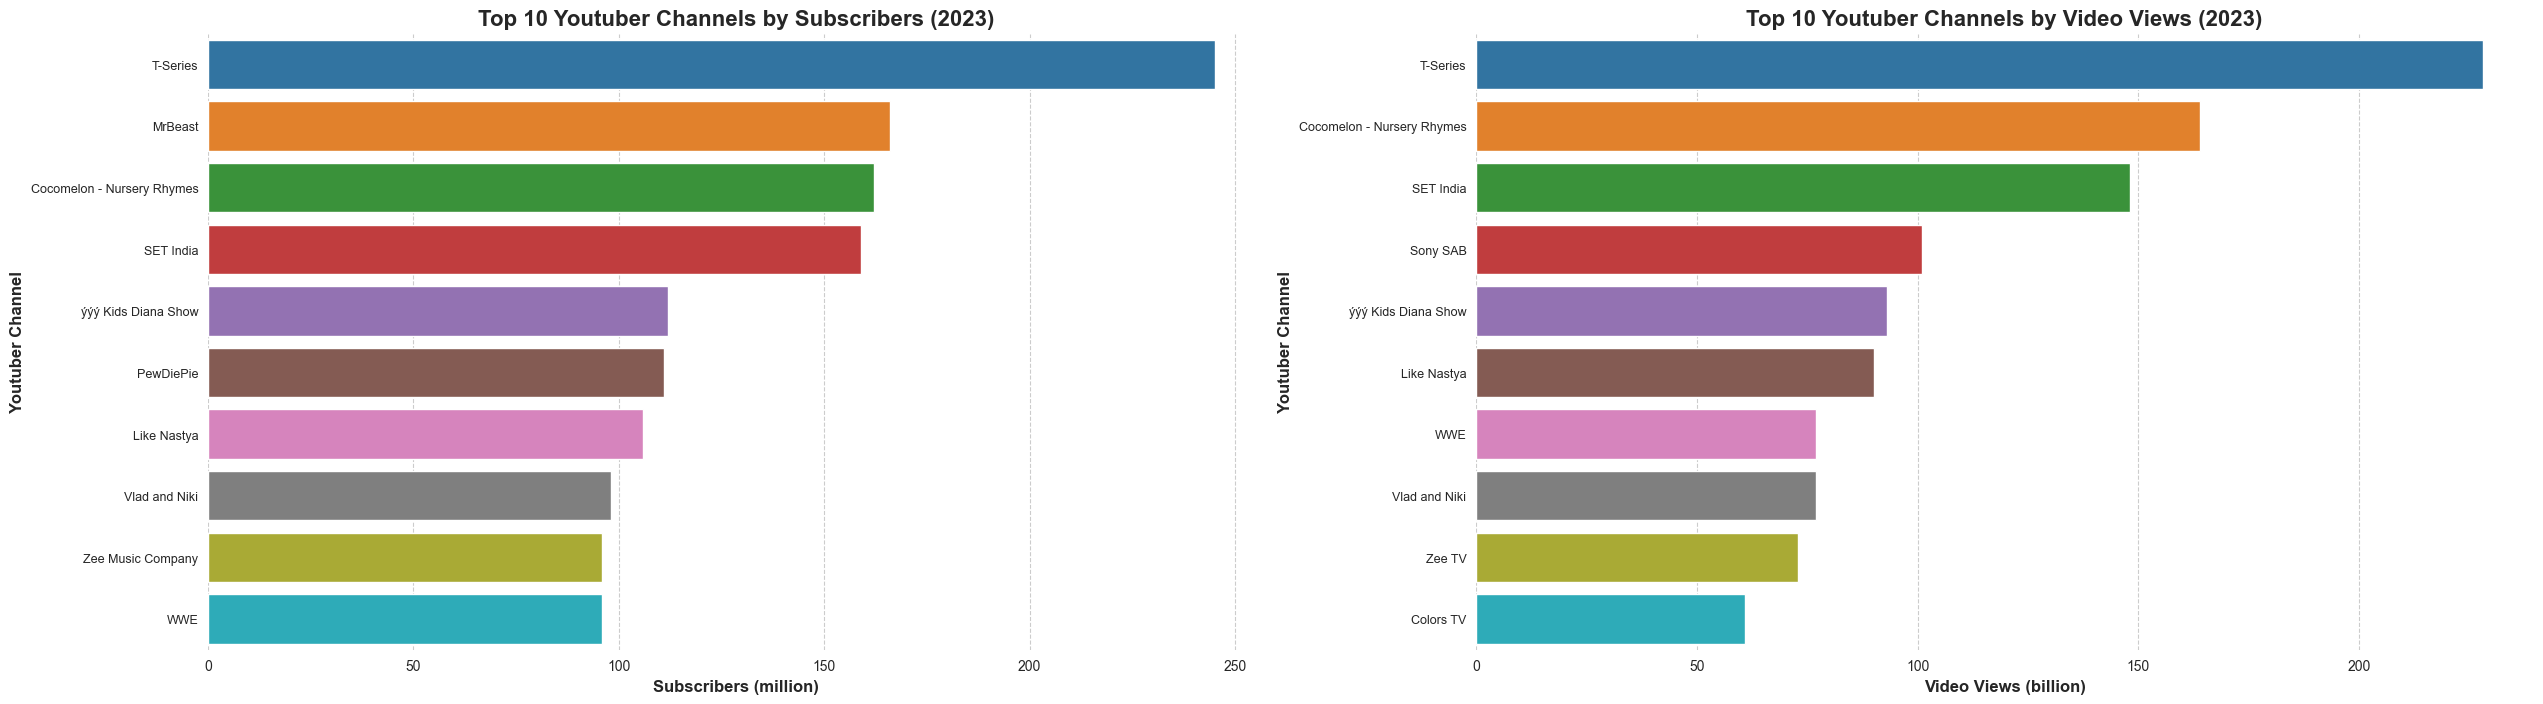

In [57]:
sb.set_style("whitegrid",{'axes.grid' : True})

fig, ax = plt.subplots(1, 2, figsize = (30,8))

sb.barplot(top_10_subs,x = 'Subscribers (million)' ,y = 'Youtuber', ax = ax[0])
ax[0].set_title('Top 10 Youtuber Channels by Subscribers (2023)',fontweight = 'heavy', fontsize = 16)
ax[0].set_xlabel('Subscribers (million)',fontweight = 'heavy', fontsize = 12)
ax[0].set_ylabel('Youtuber Channel',fontweight = 'heavy', fontsize = 12)
ax[0].grid(axis = 'x', linestyle ='--')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
plt.sca(ax[0])
plt.yticks(size = 9)

sb.barplot(top_10_views,x = 'Video Views (billion)' ,y = 'Youtuber',  ax = ax[1]) 
ax[1].set_title('Top 10 Youtuber Channels by Video Views (2023)',fontweight = 'heavy', fontsize = 16)
ax[1].set_xlabel('Video Views (billion)',fontweight = 'heavy', fontsize = 12)
ax[1].set_ylabel('Youtuber Channel',fontweight = 'heavy', fontsize = 12)
ax[1].grid(axis = 'x', linestyle ='--')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
plt.sca(ax[1])
plt.yticks(size = 9)

plt.show()

*Observations:*
- Overall, looking at the bar charts, 7 out of the top 10 channels with the highest subscribers are also present in the top 10 channels with the highest video views.  
- There is not a significant change in the rankings when transitioning from Subscribers to Video Views, except for the channel 'T-Series,' which maintains the top position in both categories.  
=> Is there a correlation between the number of subscribers and views? Let's delve deeper into the relationship between these two variables in the next section.  

### *2. Does a higher number of subscribers on a YouTube channel imply higher views?*  

In [58]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 982 non-null    object 
 1   Subscribers                              982 non-null    int64  
 2   Video Views                              982 non-null    float64
 3   Uploads                                  982 non-null    int64  
 4   Category                                 982 non-null    object 
 5   Country                                  982 non-null    object 
 6   Abbreviation                             982 non-null    object 
 7   Lowest Monthly Earnings                  982 non-null    float64
 8   Highest Monthly Earnings                 982 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  982 non-null    float64
 10  Unemployment Rate                        982 non-n

In [59]:
correlation = youtube[['Subscribers', 'Video Views', 'Uploads', 'Lowest Monthly Earnings', 'Highest Monthly Earnings', 'Gross Tertiary Education Enrollment (%)', 'Unemployment Rate', 'Population', 'Urban Population', 'Created Year']].corr()
correlation

,Subscribers,Video Views,Uploads,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
Subscribers,1.000000,0.824174,0.088540,0.428528,0.428144,-0.018473,-0.022404,0.086179,0.081013,-0.134729
Video Views,0.824174,1.000000,0.164407,0.550703,0.550058,-0.012243,0.001517,0.077742,0.075256,-0.139450
Uploads,0.088540,0.164407,1.000000,0.165461,0.165822,-0.216902,-0.187058,0.141970,0.072369,-0.165089
Lowest Monthly Earnings,0.428528,0.550703,0.165461,1.000000,0.999955,-0.056898,-0.039307,0.098667,0.076990,0.071728
Highest Monthly Earnings,0.428144,0.550058,0.165822,0.999955,1.000000,-0.056695,-0.039074,0.098649,0.077016,0.071696
Gross Tertiary Education Enrollment (%),-0.018473,-0.012243,-0.216902,-0.056898,-0.056695,1.000000,0.673789,-0.573477,-0.299524,-0.144953
Unemployment Rate,-0.022404,0.001517,-0.187058,-0.039307,-0.039074,0.673789,1.000000,-0.218089,0.140554,-0.116527
Population,0.086179,0.077742,0.141970,0.098667,0.098649,-0.573477,-0.218089,1.000000,0.909877,0.112620
Urban Population,0.081013,0.075256,0.072369,0.076990,0.077016,-0.299524,0.140554,0.909877,1.000000,0.075162
Created Year,-0.134729,-0.139450,-0.165089,0.071728,0.071696,-0.144953,-0.116527,0.112620,0.075162,1.000000


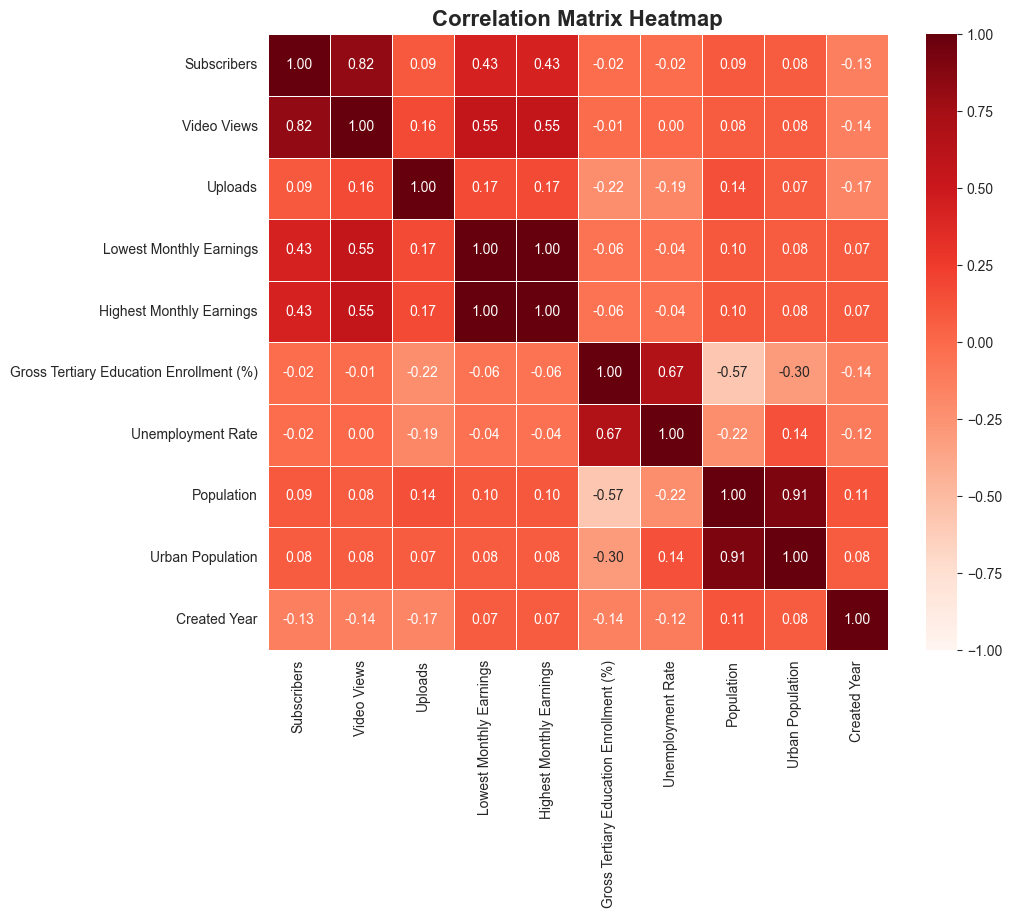

In [60]:
#Visualization heatmap

plt.figure(figsize= (10,8))
plt.title('Correlation Matrix Heatmap', fontweight = 'heavy', fontsize = 16)
sb.heatmap(correlation, annot= True,
           cmap= 'Reds',
           vmin= -1, vmax= 1,
           linecolor = 'white', linewidths = 0.5,
           fmt = '.2f'
           )
plt.show()

*Observations:*
- The heatmap showing the correlation between continuous variables reveals a relatively high correlation between the variables `Subscribers` and `Video Views`.  
- The correlation of these two variables with the others is at a moderately weak level, with no correlation to the `Uploads` variable.  
- The variables `Lowest Monthly Earnings` and `Highest Monthly Earnings` show an absolute correlation of 100%.  
=> Let's explore the correlation of variables in more detail by visualizing it through scatter plots.  

In [61]:
#Statistics Subscriber (million), Video Views (billion) & Uploads (k.)

#Select columns to show output
select_columns = ['Youtuber', 'Subscribers', 'Video Views', 'Uploads']

#Filter dataframe by select_columns
youtube_corr_statistics = youtube[select_columns]

#Convert 'Subscriber' in millions
youtube_corr_statistics['Subscribers (million)'] = (youtube_corr_statistics['Subscribers'] / 1000000).astype('int')

#Convert 'Video Views' in millions
youtube_corr_statistics['Video Views (billion)'] = (youtube_corr_statistics['Video Views'] / 1000000000).astype('int')

#Convert 'Uploads' in thousand
youtube_corr_statistics['Uploads (k.)'] = (youtube_corr_statistics['Uploads'] / 1000)

youtube_corr_statistics = youtube_corr_statistics[['Youtuber', 'Subscribers (million)', 'Video Views (billion)', 'Uploads (k.)' ]]

#Show dataframe
youtube_corr_statistics.head()

/var/folders/7t/8jntnw7951dd8cswq6xhbw8m0000gn/T/ipykernel_89447/1579550503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_corr_statistics['Subscribers (million)'] = (youtube_corr_statistics['Subscribers'] / 1000000).astype('int')
/var/folders/7t/8jntnw7951dd8cswq6xhbw8m0000gn/T/ipykernel_89447/1579550503.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_corr_statistics['Video Views (billion)'] = (youtube_corr_statistics['Video Views'] / 1000000000).astype('int')
/var/folders/7t/8jn

,Youtuber,Subscribers (million),Video Views (billion),Uploads (k.)
0,T-Series,245,228,20.082
1,MrBeast,166,28,0.741
2,Cocomelon - Nursery Rhymes,162,164,0.966
3,SET India,159,148,116.536
4,ýýý Kids Diana Show,112,93,1.111


In [62]:
youtube_corr_statistics['Video Views (billion)'].mean()

10.65376782077393

In [63]:
youtube_corr_statistics['Subscribers (million)'].mean()

22.19246435845214

In [64]:
per_subs = round(np.percentile(youtube_corr_statistics['Subscribers (million)'], 95))
per_views = round(np.percentile(youtube_corr_statistics['Video Views (billion)'], 95))

print('95% of YouTube channels have subscribers below:', per_subs, 'million')
print('95% of YouTube channels have video views below:', per_views, 'billion')

95% of YouTube channels have subscribers below: 45 million
95% of YouTube channels have video views below: 28 billion


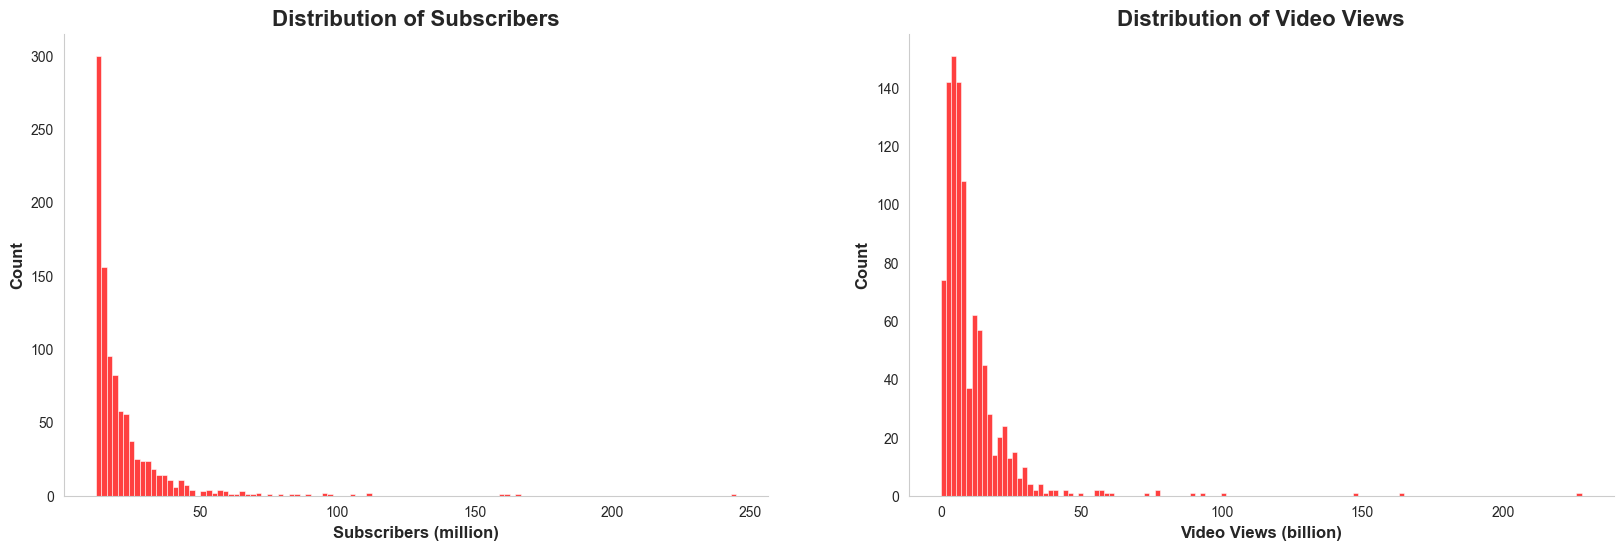

In [65]:
sb.set_style("whitegrid",{'axes.grid' : False})
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,6))
sb.histplot(youtube_corr_statistics['Subscribers (million)'], color= 'red',ax = ax1)
ax1.set_title('Distribution of Subscribers', fontweight = 'heavy', fontsize = 16)
ax1.set_xlabel('Subscribers (million)', fontweight = 'heavy', fontsize = 12)
ax1.set_ylabel('Count', fontweight = 'heavy', fontsize = 12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

sb.histplot(youtube_corr_statistics['Video Views (billion)'], color= 'red', ax = ax2)
ax2.set_title('Distribution of Video Views', fontweight = 'heavy', fontsize = 16)
ax2.set_xlabel('Video Views (billion)', fontweight = 'heavy', fontsize = 12)
ax2.set_ylabel('Count', fontweight = 'heavy', fontsize = 12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)

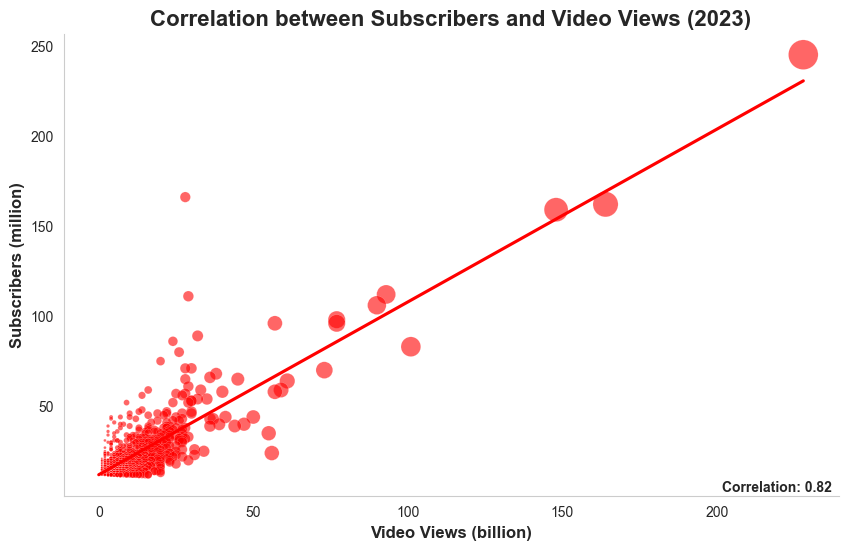

In [66]:
# Calculate the correlation coefficient
correlation = youtube_corr_statistics['Subscribers (million)'].corr(youtube_corr_statistics['Video Views (billion)'])

# Set scaling factor of circle size
scaling_factor = 2 

# Calculate the size of circles 
sizes = youtube_corr_statistics['Video Views (billion)'] * scaling_factor

# Chart
plt.figure(figsize= (10,6))
plt.title('Correlation between Subscribers and Video Views (2023)', fontweight = 'heavy', fontsize = 16 )
sb.scatterplot(data= youtube_corr_statistics, x='Video Views (billion)', y='Subscribers (million)', color = 'red',alpha=0.6, s = sizes)
sb.regplot(data= youtube_corr_statistics,  x='Video Views (billion)', y='Subscribers (million)', scatter=False, ci=None,line_kws={"color": "red"})
plt.xlabel('Video Views (billion)', fontweight = 'heavy', fontsize = 12)
plt.ylabel('Subscribers (million)', fontweight = 'heavy', fontsize = 12)
# plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

sb.despine(left=False, bottom=False)
plt.grid(axis = 'y', linestyle ='')
# Note correlation
plt.annotate(f'Correlation: {correlation:.2f}', 
             xy = (0.85, 0.01), 
             xycoords = 'axes fraction', 
             fontsize = 10, 
             weight = 'bold')
plt.show()

*Observations:*  
- From the results of the top 10 in terms of subscribers and views with a correlation rate of up to 82%, the scatter plot illustrates the positive relationship between the two variables (a YouTube channel with more subscribers tends to have higher views).  
- Looking at the scatter plot, we see that the majority of data is concentrated in a considerably lower range compared to the previously mentioned top 10, with only a small fraction of channels having significantly higher subscribers and views.  
- Specifically, the histogram plot indicates that 95% of YouTube channels have fewer than 46 million subscribers and less than 28 billion views.  
=> This leads to the conclusion that:  
  - There is a significant dependency between the number of subscribers and views. Additionally, the figures indicate that only a few channels truly outperform the rest in terms of success (measured by Subscribers and Views).  
  - The question then arises: What factors contribute to the success of a YouTube channel?

### *3. Does uploading more videos on a YouTube channel lead to an increase in subscribers and views?*

In [67]:
top_upload_channels = youtube[['Youtuber', 'Category', 'Uploads']].sort_values(by= 'Uploads', ascending= False).reset_index(drop= True).head(10)
top_upload_channels

,Youtuber,Category,Uploads
0,ABP NEWS,People & Blogs,301308
1,GMA Integrated News,News & Politics,296272
2,TV9 Bharatvarsh,People & Blogs,293516
3,Aaj Tak,News & Politics,283775
4,IndiaTV,News & Politics,273255
5,KOMPASTV,News & Politics,269050
6,Thairath Online,News & Politics,244899
7,News 24,News & Politics,211620
8,ABS-CBN News,News & Politics,209520
9,TEDx Talks,Nonprofits & Activism,200933


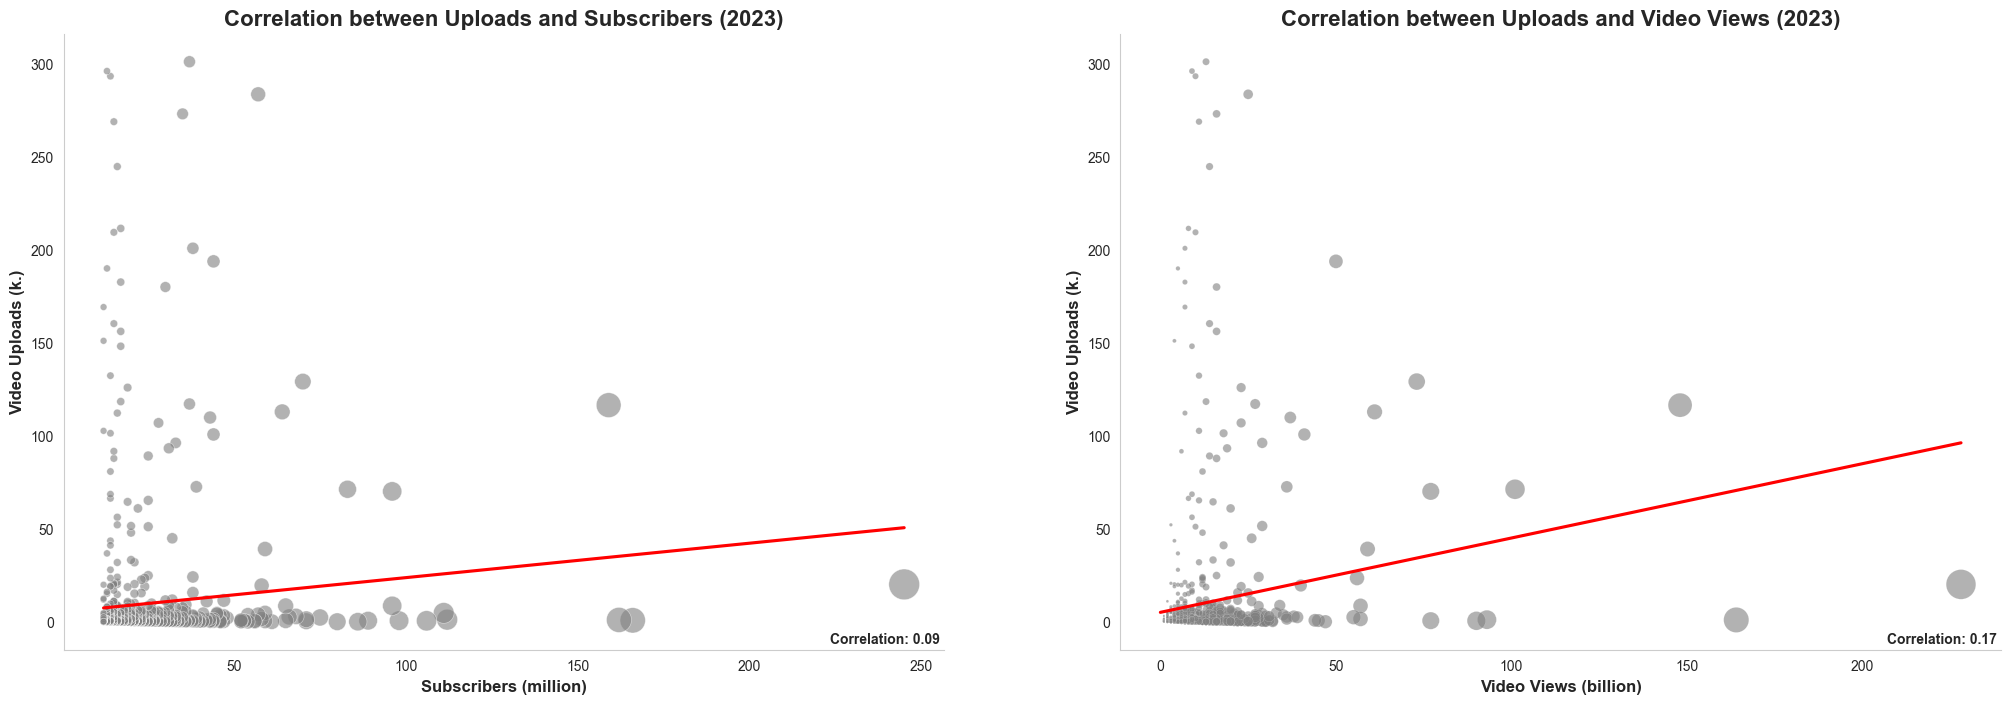

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [70]:
fig, ax = plt.subplots(1, 2, figsize = (25,8))

#Upload & Subscribers
# Calculate the correlation coefficient
correlation_ax0 = youtube_corr_statistics['Uploads (k.)'].corr(youtube_corr_statistics['Subscribers (million)'])
# Set scaling factor of circle size
scaling_factor_ax0 = 2 
# Calculate the size of circles 
sizes_ax0 = youtube_corr_statistics['Subscribers (million)'] * scaling_factor_ax0
# Chart
plt.figure(figsize= (10,6))
ax[0].set_title('Correlation between Uploads and Subscribers (2023)', fontweight = 'heavy', fontsize = 16 )
sb.scatterplot(data= youtube_corr_statistics, x='Subscribers (million)', y='Uploads (k.)', color = 'gray',alpha=0.6, s = sizes_ax0, ax= ax[0])
sb.regplot(data= youtube_corr_statistics,  x='Subscribers (million)', y='Uploads (k.)', scatter=False, ci=None,line_kws={"color": "red"}, ax= ax[0])
ax[0].set_xlabel('Subscribers (million)', fontweight = 'heavy', fontsize = 12)
ax[0].set_ylabel('Video Uploads (k.)', fontweight = 'heavy', fontsize = 12)
ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False) 
ax[0].annotate(f'Correlation: {correlation_ax0:.2f}', 
             xy = (0.87, 0.01), 
             xycoords = 'axes fraction', 
             fontsize = 10, 
             weight = 'bold')


#Uploads & Video Views
# Calculate the correlation coefficient
correlation_ax1 = youtube_corr_statistics['Uploads (k.)'].corr(youtube_corr_statistics['Video Views (billion)'])
# Set scaling factor of circle size
scaling_factor_ax1 = 2 
# Calculate the size of circles 
sizes_ax1 = youtube_corr_statistics['Video Views (billion)'] * scaling_factor
# Chart
plt.figure(figsize= (10,6))
ax[1].set_title('Correlation between Uploads and Video Views (2023)', fontweight = 'heavy', fontsize = 16 )
sb.scatterplot(data= youtube_corr_statistics, x='Video Views (billion)', y='Uploads (k.)', color = 'gray',alpha=0.6, s = sizes_ax1, ax= ax[1])
sb.regplot(data= youtube_corr_statistics,  x='Video Views (billion)', y='Uploads (k.)', scatter=False, ci=None,line_kws={"color": "red"}, ax= ax[1])
ax[1].set_xlabel('Video Views (billion)', fontweight = 'heavy', fontsize = 12)
ax[1].set_ylabel('Video Uploads (k.)', fontweight = 'heavy', fontsize = 12)
ax[1].annotate(f'Correlation: {correlation_ax1:.2f}', 
             xy = (0.87, 0.01), 
             xycoords = 'axes fraction', 
             fontsize = 10,          
             weight = 'bold')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.show()

*Observations:*
- With extremely low correlation rates (0.9% and 17%) and inconsistent data dispersion, it can be concluded that a YouTube channel with many uploaded videos does not necessarily correlate with higher subscribers and views.
- This implies that the quality and content of videos may play a more crucial role in attracting subscribers and viewers rather than focusing solely on the quantity of uploaded videos.
- Additionally, an exception is indicated through the two scatter plots, showing a few channels that exhibit a unique contrast with very low subscribers and views but a significantly high number of uploaded videos. This could suggest the presence of a content category being heavily exploited by organizations with ample resources and long-term operations. It is reasonable to assume that these channels might belong to entertainment, news, or music genres known for uploading numerous short videos on a 24-hour cycle, such as news headlines or interview excerpts.  
=> So, which categories are being explored with high frequency?

### *4. Which types of YouTube channels have the highest number of uploaded videos?*  

In [74]:
#Statistics by Category

#Group by lots of feature by Category
statis_category = youtube.groupby('Category').agg({'Category' : 'count',
                                                   'Uploads' : 'sum',
                                                   'Subscribers' : 'sum',
                                                   'Video Views' : 'sum'
                                                })
#Rename count feature
statis_category = statis_category.rename(columns= {'Category' : 'Count of Category'}).reset_index()

#Unit conversion
statis_category['Video Views (billion)'] = (statis_category['Video Views']/1000000000).astype('int')
statis_category['Subscribers (million)'] = (statis_category['Subscribers']/1000000).astype('int')
statis_category['Uploads (k.)'] = (statis_category['Uploads']/1000).astype('int')

#Select feature
statis_category = statis_category[['Category', 'Count of Category', 'Uploads (k.)','Subscribers (million)', 'Video Views (billion)']] #

#Show statistics table
statis_category

,Category,Count of Category,Uploads (k.),Subscribers (million),Video Views (billion)
0,Autos & Vehicles,2,3,35,15
1,Comedy,69,77,1388,550
2,Education,45,141,1194,696
3,Entertainment,240,2869,5139,2518
4,Film & Animation,45,128,1144,544
5,Gaming,93,405,1942,713
6,Howto & Style,40,66,775,201
7,Movies,2,7,51,15
8,Music,200,471,5155,3103
9,News & Politics,26,2924,536,270


In [75]:
#Select feature to to summary about Uploads
uploads_category = statis_category[['Category', 'Uploads (k.)']]

#Group features with counts under 300 into the general category other
uploads_category.loc[uploads_category['Uploads (k.)'] < 300, 'Category'] = 'Other'
uploads_category = uploads_category.groupby(['Category'])['Uploads (k.)'].sum().reset_index().sort_values(by = 'Uploads (k.)', ascending= False)

total = sum(uploads_category['Uploads (k.)'])
uploads_category['Percent Uploads (%)'] = [round((value / total) * 100,0) for value in uploads_category['Uploads (k.)']]
uploads_category.reset_index(drop= True, inplace= True)

#Show statistics table
uploads_category

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Category,Uploads (k.),Percent Uploads (%)
0,News & Politics,2924,32.0
1,Entertainment,2869,31.0
2,People & Blogs,1213,13.0
3,Other,891,10.0
4,Music,471,5.0
5,Gaming,405,4.0
6,Shows,356,4.0


In [76]:
uploads_category = uploads_category.sort_values(by = 'Percent Uploads (%)',  ascending= True)

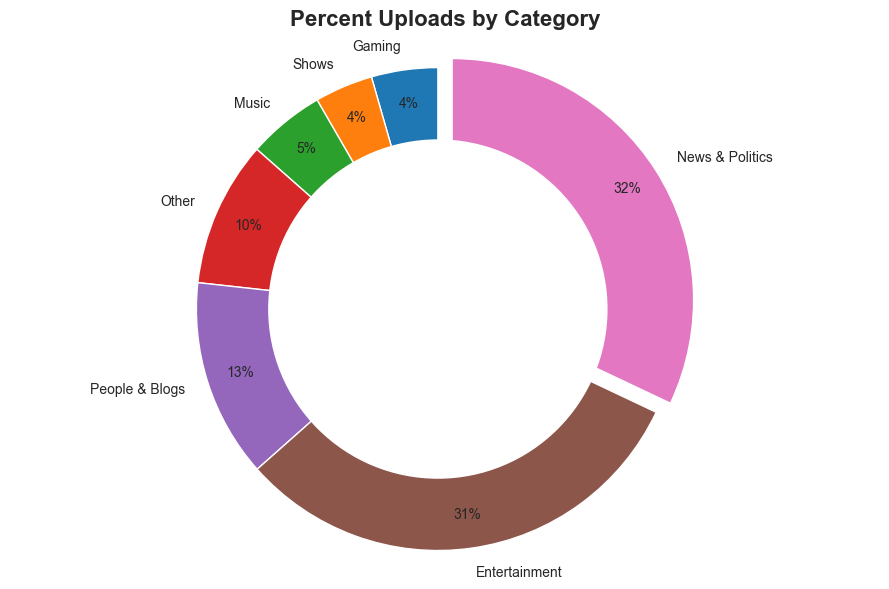

In [77]:
labels = uploads_category['Category']
sizes = uploads_category['Uploads (k.)']

explode = [0, 0, 0, 0, 0, 0, 0.07]
plt.figure(figsize= (9,6))
plt.pie(sizes, labels= labels,
        autopct='%1.0f%%',
        startangle=90,
        explode= explode,
        pctdistance=0.86)
# 
# plt.legend(title = 'Category',bbox_to_anchor=(1.1, 1), labels = labels)
plt.axis('equal')
plt.title('Percent Uploads by Category', fontweight = 'heavy', fontsize = 16)
plt.tight_layout()

circle = plt.Circle(xy= (0,0), radius= .70, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show();

*Observations:*  
It can be observed that the previous speculation is well-founded: Nearly two-thirds (63.5%) of the total uploads are evenly distributed between the News & Politics and Entertainment categories. Leading this distribution is the News & Politics category, accounting for 32.1% (2924K uploads) of the total uploaded videos (with a slight difference from the second position, Entertainment, at 31.4%). The remaining categories represent a very small percentage.  
`What makes the difference between these two categories compared to the others?`
- `News & Politics` is a category focused on uploading news and political videos, including news reports, documentaries, interviews, discussions, and other TV programs. Content in this category requires accuracy and constant updates, meaning it does not tend to generate repeat views of old news. In reality, these topics often require a large resource-backed team to exploit. This may be government-owned and managed organizations or high-profile departments influencing the public by providing useful information to viewers. This is one of the exceptions on YouTube where the number of uploaded videos is the highest without relying on views and subscriptions.
- In contrast, `Entertainment` is the leading entertainment category with diverse topics such as music, games, news-entertainment, movies-TV shows, etc. This is a category that can be explored by almost anyone, regardless of size, as it covers a wide range of topics. Channels in this category are often influenced by views and subscriptions, which are factors driving and sustaining the growth of channels built by individuals.
- Nowadays, with the increasing trend of short-form videos from platforms like TikTok, Instagram Reels, Facebook Short-form videos, YouTube also embraces this trend with `Short`. This model can generate many uploads in a short period while still attracting a modern audience. Influencers, KOLs, etc., who produce short videos with low budgets, ranging from 30 seconds to 1 minute, receive significant interactions from various platforms, including YouTube.  
=> So, is the high number of uploaded videos in these two categories due to many YouTubers exploring these categories?

### *5. What is the distribution of YouTube channels in each category?*  

In [78]:
#Select features
count_category = statis_category[['Category', 'Count of Category']].sort_values(by = 'Count of Category', ascending= False).reset_index(drop = True)

# Group features with counts under 300 into the general category other
count_category.loc[count_category['Count of Category'] < 20, 'Category'] = 'Other'
count_category = count_category.groupby(['Category'])['Count of Category'].sum().reset_index().sort_values(by = 'Count of Category', ascending= False)


# total = sum(count_category['Count of Category'])
# count_category['Percent Category'] = [round((value / total) * 100,0) for value in count_category['Count of Category']]
count_category.reset_index(drop= True, inplace= True)

#Show statistics table
count_category

,Category,Count of Category
0,Entertainment,240
1,Music,200
2,People & Blogs,131
3,Gaming,93
4,Other,93
5,Comedy,69
6,Education,45
7,Film & Animation,45
8,Howto & Style,40
9,News & Politics,26


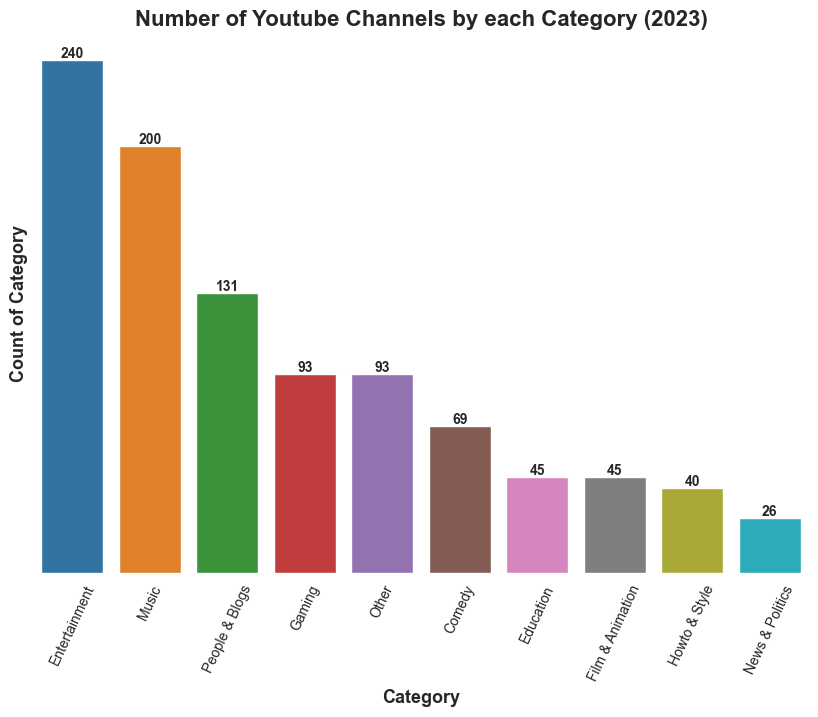

In [80]:
sb.set_style("whitegrid",{'axes.grid' : False})

plt.figure(figsize=(10,7))
# Select data for categoies and values feature
cnt_category = count_category['Count of Category'].to_list()

#Chart
plt.title('Number of Youtube Channels by each Category (2023)', fontsize = 16, fontweight = 'heavy')
sb.barplot(data= count_category, x = 'Category', y = 'Count of Category')

#Add number for each columns
for i, value in enumerate(cnt_category):
    plt.text(i, value + 1, cnt_category[i],  ha = 'center', fontsize=10, fontweight = 'heavy')

sb.despine(left=True, bottom=True)
plt.grid(axis = 'y', linestyle ='--')
plt.xlabel('Category', fontsize = 13, fontweight = 'heavy')
plt.ylabel('Count of Category', fontweight = 'heavy', fontsize = 13) 
plt.xticks(rotation = 65) 
plt.yticks([]) #loại bỏ các tham số trên trục y
plt.show()

*Observations:*  
- We can see that with just three categories, namely `Entertainment` (236 channels), `Music` (202 channels), and `People & Blogs` (129 channels), they account for nearly 60% of the total number of YouTube channels.   
- In the first position, as previously evidenced, the `Entertainment` category has the second-highest number of video uploads due to the diverse content that can be explored by any individual or organization. This is a "rich" category where anyone with creative ability can tap into the technological goldmine of the era, and it is also the most competitive category.  
- The diversity in music genres has created broad access opportunities for music creators. Alongside this is the popularity, ease of creation, and sharing with users through various forms such as covers, self-composed videos, or content related to their favorite music genres. These are the reasons why `Music` becomes the second-largest category in terms of the number of channels.  
- Notably, the `Education`, `Howto & Style`, and `News & Politics` categories all rank at the bottom. These are categories that convey useful content to viewers but have relatively limited channel numbers. Typical reasons, as mentioned earlier, include the case of `News & Politics` requiring significant resources to maintain and develop, coupled with strict content requirements and near-absolute accuracy, making it manageable only by a few organizations. Education and channels containing instructional content in a specific life domain require special knowledge capital along with experience in the field they want to convey. This somewhat limits the scope for those who have the ability to create, develop, and maintain a channel.  
=> So, beyond the mentioned reasons, is the concentration of the most successful channels in the `Entertainment`, `Music`, and `People & Blogs` categories primarily due to diversity, popularity, or the ease of exploiting content by anyone? Or is this also a user trend on YouTube?